In [ ]:
!pip install matplotlib pandas seaborn scikit-learn

In [3]:
# E-commerce Customer Lifetime Value (CLV) Prediction Project
# Domain: E-commerce & Digital Marketing
# Business Problem: Optimizing Marketing Spend and Customer Retention

"""
PROJECT STORY & CONTEXT:
=======================
An e-commerce company is struggling with:
1. High customer acquisition costs (CAC = $45)
2. Declining customer retention (60% churn in first year)
3. Inefficient marketing budget allocation ($2M annual spend)
4. Need to identify high-value customers for personalized campaigns

BUSINESS IMPACT:
===============
- Reduce customer acquisition costs by 25%
- Increase customer retention by 15%
- Optimize marketing ROI by focusing on high-CLV customers
- Expected revenue impact: $3.2M annually
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Matplotlib is building the font cache; this may take a moment.


In [4]:
class CLVPredictor:
    """
    Customer Lifetime Value Predictor for E-commerce
    
    This class demonstrates:
    - Clean code architecture (addressing messy GitHub issue)
    - Domain expertise in e-commerce metrics
    - Business-focused approach
    """
    
    def __init__(self):
        self.models = {}
        self.scaler = StandardScaler()
        self.feature_importance = None
        self.business_insights = {}
    
    def generate_synthetic_data(self, n_customers=5000):
        """
        Generate realistic e-commerce customer data
        
        Features based on real e-commerce KPIs:
        - Recency, Frequency, Monetary (RFM analysis)
        - Customer demographics and behavior
        - Seasonal patterns
        """
        np.random.seed(42)
        
        # Customer Demographics
        data = {
            'customer_id': range(1, n_customers + 1),
            'age': np.random.normal(35, 12, n_customers).clip(18, 80),
            'gender': np.random.choice(['M', 'F'], n_customers),
            'city_tier': np.random.choice([1, 2, 3], n_customers, p=[0.3, 0.4, 0.3]),
            
            # RFM Features
            'recency_days': np.random.exponential(30, n_customers).clip(1, 365),
            'frequency': np.random.poisson(8, n_customers).clip(1, 50),
            'monetary_value': np.random.lognormal(4, 1, n_customers).clip(50, 5000),
            
            # Behavioral Features
            'avg_order_value': np.random.lognormal(4, 0.8, n_customers).clip(25, 2000),
            'days_since_first_order': np.random.exponential(180, n_customers).clip(30, 1095),
            'customer_service_calls': np.random.poisson(1.5, n_customers).clip(0, 15),
            'returns_count': np.random.poisson(0.8, n_customers).clip(0, 10),
            
            # Channel Preferences
            'mobile_usage_pct': np.random.beta(2, 2, n_customers) * 100,
            'email_open_rate': np.random.beta(2, 3, n_customers) * 100,
            'social_media_engagement': np.random.exponential(10, n_customers).clip(0, 100),
            
            # Seasonal behavior
            'holiday_purchases': np.random.poisson(2, n_customers).clip(0, 10),
            'discount_sensitivity': np.random.beta(3, 2, n_customers) * 100,
        }
        
        df = pd.DataFrame(data)
        
        # Create realistic CLV based on features (target variable)
        clv_base = (
            df['frequency'] * df['avg_order_value'] * 0.8 +
            df['monetary_value'] * 0.6 +
            (365 - df['recency_days']) * 2 +
            df['email_open_rate'] * 5 +
            df['days_since_first_order'] * 0.5 -
            df['customer_service_calls'] * 20 -
            df['returns_count'] * 15
        )
        
        # Add some noise and ensure positive values
        df['customer_lifetime_value'] = (clv_base + 
                                       np.random.normal(0, 50, n_customers)).clip(100, 10000)
        
        return df
    
    def exploratory_data_analysis(self, df):
        """
        Comprehensive EDA with business insights
        """
        print("=== CUSTOMER LIFETIME VALUE ANALYSIS ===")
        print(f"Dataset Shape: {df.shape}")
        print(f"Average CLV: ${df['customer_lifetime_value'].mean():.2f}")
        print(f"Median CLV: ${df['customer_lifetime_value'].median():.2f}")
        print(f"CLV Standard Deviation: ${df['customer_lifetime_value'].std():.2f}")
        
        # Create comprehensive visualizations
        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('E-commerce Customer Lifetime Value Analysis', fontsize=16, fontweight='bold')
        
        # 1. CLV Distribution
        axes[0,0].hist(df['customer_lifetime_value'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0,0].axvline(df['customer_lifetime_value'].mean(), color='red', linestyle='--', 
                         label=f'Mean: ${df["customer_lifetime_value"].mean():.0f}')
        axes[0,0].set_title('Customer Lifetime Value Distribution')
        axes[0,0].set_xlabel('CLV ($)')
        axes[0,0].set_ylabel('Number of Customers')
        axes[0,0].legend()
        
        # 2. CLV by Customer Segments
        df['clv_segment'] = pd.cut(df['customer_lifetime_value'], 
                                  bins=[0, 500, 1000, 2000, float('inf')],
                                  labels=['Low', 'Medium', 'High', 'Premium'])
        
        segment_counts = df['clv_segment'].value_counts()
        axes[0,1].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%')
        axes[0,1].set_title('Customer Segments by CLV')
        
        # 3. RFM Analysis
        axes[0,2].scatter(df['frequency'], df['monetary_value'], 
                         c=df['customer_lifetime_value'], cmap='viridis', alpha=0.6)
        axes[0,2].set_xlabel('Purchase Frequency')
        axes[0,2].set_ylabel('Monetary Value ($)')
        axes[0,2].set_title('Frequency vs Monetary Value\n(Color = CLV)')
        
        # 4. Age vs CLV
        axes[1,0].scatter(df['age'], df['customer_lifetime_value'], alpha=0.6, color='coral')
        axes[1,0].set_xlabel('Customer Age')
        axes[1,0].set_ylabel('CLV ($)')
        axes[1,0].set_title('Customer Age vs CLV')
        
        # 5. Recency Impact
        axes[1,1].boxplot([df[df['recency_days'] <= 30]['customer_lifetime_value'],
                          df[(df['recency_days'] > 30) & (df['recency_days'] <= 90)]['customer_lifetime_value'],
                          df[df['recency_days'] > 90]['customer_lifetime_value']])
        axes[1,1].set_xticklabels(['Recent\n(≤30 days)', 'Moderate\n(31-90 days)', 'Distant\n(>90 days)'])
        axes[1,1].set_title('CLV by Customer Recency')
        axes[1,1].set_ylabel('CLV ($)')
        
        # 6. Channel Performance
        mobile_high = df[df['mobile_usage_pct'] > 70]['customer_lifetime_value'].mean()
        mobile_low = df[df['mobile_usage_pct'] <= 70]['customer_lifetime_value'].mean()
        
        axes[1,2].bar(['High Mobile Usage\n(>70%)', 'Low Mobile Usage\n(≤70%)'], 
                     [mobile_high, mobile_low], color=['#FF6B6B', '#4ECDC4'])
        axes[1,2].set_title('CLV by Mobile Usage')
        axes[1,2].set_ylabel('Average CLV ($)')
        
        plt.tight_layout()
        plt.show()
        
        # Business Insights
        self.business_insights = {
            'high_value_customers_pct': (df['customer_lifetime_value'] > 2000).mean() * 100,
            'avg_clv_by_tier': df.groupby('city_tier')['customer_lifetime_value'].mean().to_dict(),
            'mobile_impact': mobile_high - mobile_low,
            'frequency_correlation': df['frequency'].corr(df['customer_lifetime_value'])
        }
        
        return df
    
    def feature_engineering(self, df):
        """
        Create advanced features based on domain knowledge
        """
        df_engineered = df.copy()
        
        # RFM Score (classic e-commerce metric) - handle duplicates
        try:
            recency_score = pd.qcut(df['recency_days'], 5, labels=[5,4,3,2,1], duplicates='drop').astype(int)
        except:
            recency_score = pd.cut(df['recency_days'], 5, labels=[5,4,3,2,1]).astype(int)
        
        try:
            frequency_score = pd.qcut(df['frequency'], 5, labels=[1,2,3,4,5], duplicates='drop').astype(int)
        except:
            frequency_score = pd.cut(df['frequency'], 5, labels=[1,2,3,4,5]).astype(int)
        
        try:
            monetary_score = pd.qcut(df['monetary_value'], 5, labels=[1,2,3,4,5], duplicates='drop').astype(int)
        except:
            monetary_score = pd.cut(df['monetary_value'], 5, labels=[1,2,3,4,5]).astype(int)
        
        df_engineered['rfm_score'] = recency_score + frequency_score + monetary_score
        
        # Customer Lifecycle Stage
        df_engineered['lifecycle_stage'] = pd.cut(
            df_engineered['days_since_first_order'],
            bins=[0, 90, 365, 730, float('inf')],
            labels=['New', 'Developing', 'Established', 'Loyal']
        )
        
        # Engagement Score
        df_engineered['engagement_score'] = (
            df_engineered['email_open_rate'] * 0.4 +
            df_engineered['mobile_usage_pct'] * 0.3 +
            df_engineered['social_media_engagement'] * 0.3
        )
        
        # Customer Health Score (lower is better)
        df_engineered['health_score'] = (
            df_engineered['customer_service_calls'] * 2 +
            df_engineered['returns_count'] * 3 +
            df_engineered['recency_days'] * 0.1
        )
        
        # Purchase Velocity (handle division by zero)
        df_engineered['purchase_velocity'] = df_engineered['frequency'] / np.maximum(df_engineered['days_since_first_order'] / 30, 1)
        
        return df_engineered
    
    def train_models(self, df):
        """
        Train multiple models and compare performance
        """
        # Prepare features
        feature_columns = [
            'age', 'city_tier', 'recency_days', 'frequency', 'monetary_value',
            'avg_order_value', 'days_since_first_order', 'customer_service_calls',
            'returns_count', 'mobile_usage_pct', 'email_open_rate',
            'social_media_engagement', 'holiday_purchases', 'discount_sensitivity',
            'rfm_score', 'engagement_score', 'health_score', 'purchase_velocity'
        ]
        
        # Handle categorical variables
        df_model = df.copy()
        le_gender = LabelEncoder()
        df_model['gender_encoded'] = le_gender.fit_transform(df_model['gender'])
        
        le_lifecycle = LabelEncoder()
        df_model['lifecycle_encoded'] = le_lifecycle.fit_transform(df_model['lifecycle_stage'])
        
        feature_columns.extend(['gender_encoded', 'lifecycle_encoded'])
        
        X = df_model[feature_columns]
        y = df_model['customer_lifetime_value']
        
        # Split data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Scale features
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Train multiple models
        models_to_train = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'Linear Regression': LinearRegression()
        }
        
        model_performance = {}
        
        print("=== MODEL TRAINING RESULTS ===")
        
        for name, model in models_to_train.items():
            if name == 'Linear Regression':
                model.fit(X_train_scaled, y_train)
                predictions = model.predict(X_test_scaled)
            else:
                model.fit(X_train, y_train)
                predictions = model.predict(X_test)
            
            # Calculate metrics
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            mae = mean_absolute_error(y_test, predictions)
            
            model_performance[name] = {
                'model': model,
                'mse': mse,
                'r2': r2,
                'mae': mae,
                'rmse': np.sqrt(mse)
            }
            
            print(f"{name}:")
            print(f"  R² Score: {r2:.4f}")
            print(f"  RMSE: ${np.sqrt(mse):.2f}")
            print(f"  MAE: ${mae:.2f}")
            print()
        
        # Select best model
        best_model_name = max(model_performance.keys(), 
                             key=lambda k: model_performance[k]['r2'])
        self.best_model = model_performance[best_model_name]['model']
        self.model_performance = model_performance
        
        # Feature importance for tree-based models
        if hasattr(self.best_model, 'feature_importances_'):
            importance_df = pd.DataFrame({
                'feature': feature_columns,
                'importance': self.best_model.feature_importances_
            }).sort_values('importance', ascending=False)
            
            self.feature_importance = importance_df
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            sns.barplot(data=importance_df.head(10), x='importance', y='feature')
            plt.title('Top 10 Most Important Features for CLV Prediction')
            plt.xlabel('Feature Importance')
            plt.tight_layout()
            plt.show()
        
        return X_test, y_test, feature_columns
    
    def business_impact_analysis(self):
        """
        Calculate concrete business impact metrics
        """
        print("=== BUSINESS IMPACT ANALYSIS ===")
        
        # Model accuracy impact
        best_r2 = max(perf['r2'] for perf in self.model_performance.values())
        best_rmse = min(perf['rmse'] for perf in self.model_performance.values())
        
        print(f"Model Accuracy: {best_r2:.1%} of CLV variance explained")
        print(f"Prediction Error: ±${best_rmse:.0f} on average")
        print()
        
        # Marketing ROI improvements
        current_cac = 45  # Current customer acquisition cost
        current_retention = 0.60  # Current retention rate
        marketing_budget = 2000000  # Annual marketing budget
        
        # Projected improvements
        clv_targeting_improvement = 0.25  # 25% better targeting
        retention_improvement = 0.15  # 15% better retention
        
        print("PROJECTED BUSINESS IMPROVEMENTS:")
        print(f"• Reduce CAC by {clv_targeting_improvement:.0%}: ${current_cac} → ${current_cac * (1-clv_targeting_improvement):.0f}")
        print(f"• Increase retention by {retention_improvement:.0%}: {current_retention:.0%} → {(current_retention * (1+retention_improvement)):.0%}")
        print()
        
        # Revenue impact calculation
        avg_clv = 1500  # Estimated from our model
        customer_base = 50000  # Estimated customer base
        
        retention_revenue_gain = customer_base * avg_clv * retention_improvement
        cac_savings = marketing_budget * clv_targeting_improvement
        total_impact = retention_revenue_gain + cac_savings
        
        print("FINANCIAL IMPACT (Annual):")
        print(f"• Revenue gain from retention: ${retention_revenue_gain:,.0f}")
        print(f"• Cost savings from efficient targeting: ${cac_savings:,.0f}")
        print(f"• TOTAL PROJECTED IMPACT: ${total_impact:,.0f}")
        print()
        
        # ROI Calculation
        model_development_cost = 50000  # Estimated cost to implement
        roi = (total_impact - model_development_cost) / model_development_cost
        print(f"• ROI on ML Investment: {roi:.0%}")
        
        return {
            'total_impact': total_impact,
            'retention_gain': retention_revenue_gain,
            'cost_savings': cac_savings,
            'roi': roi
        }
    
    def generate_actionable_recommendations(self, df):
        """
        Generate specific, actionable business recommendations
        """
        print("\n=== ACTIONABLE RECOMMENDATIONS ===")
        
        # Segment analysis
        high_value = df[df['customer_lifetime_value'] > 2000]
        at_risk = df[(df['recency_days'] > 90) & (df['customer_lifetime_value'] > 1000)]
        
        print("1. CUSTOMER SEGMENTATION STRATEGY:")
        print(f"   • {len(high_value):,} high-value customers (${high_value['customer_lifetime_value'].mean():.0f} avg CLV)")
        print(f"   • {len(at_risk):,} at-risk valuable customers need retention campaigns")
        print()
        
        print("2. MARKETING OPTIMIZATION:")
        if 'mobile_usage_pct' in self.feature_importance['feature'].head(5).values:
            print("   • Mobile experience is critical - invest in mobile app optimization")
        if 'email_open_rate' in self.feature_importance['feature'].head(5).values:
            print("   • Email engagement drives CLV - implement personalized email campaigns")
        if 'frequency' in self.feature_importance['feature'].head(5).values:
            print("   • Purchase frequency is key - create loyalty programs to increase repeat purchases")
        print()
        
        print("3. OPERATIONAL IMPROVEMENTS:")
        high_service_calls = df[df['customer_service_calls'] > 3]['customer_lifetime_value'].mean()
        low_service_calls = df[df['customer_service_calls'] <= 1]['customer_lifetime_value'].mean()
        
        if high_service_calls < low_service_calls:
            print(f"   • Reduce customer service issues - customers with >3 calls have ${low_service_calls - high_service_calls:.0f} lower CLV")
        print("   • Implement proactive customer success programs for high-CLV segments")
        print()
        
        print("4. IMMEDIATE ACTIONS:")
        print("   • Deploy CLV scores to marketing automation platform")
        print("   • Create tiered service levels based on CLV predictions")
        print("   • Launch retention campaigns for at-risk high-value customers")
        print("   • A/B test personalized experiences for different CLV segments")


🚀 E-COMMERCE CUSTOMER LIFETIME VALUE PREDICTION PROJECT

📊 GENERATING SYNTHETIC E-COMMERCE DATA...

🔍 PERFORMING EXPLORATORY DATA ANALYSIS...
=== CUSTOMER LIFETIME VALUE ANALYSIS ===
Dataset Shape: (5000, 17)
Average CLV: $1470.99
Median CLV: $1336.27
CLV Standard Deviation: $537.09


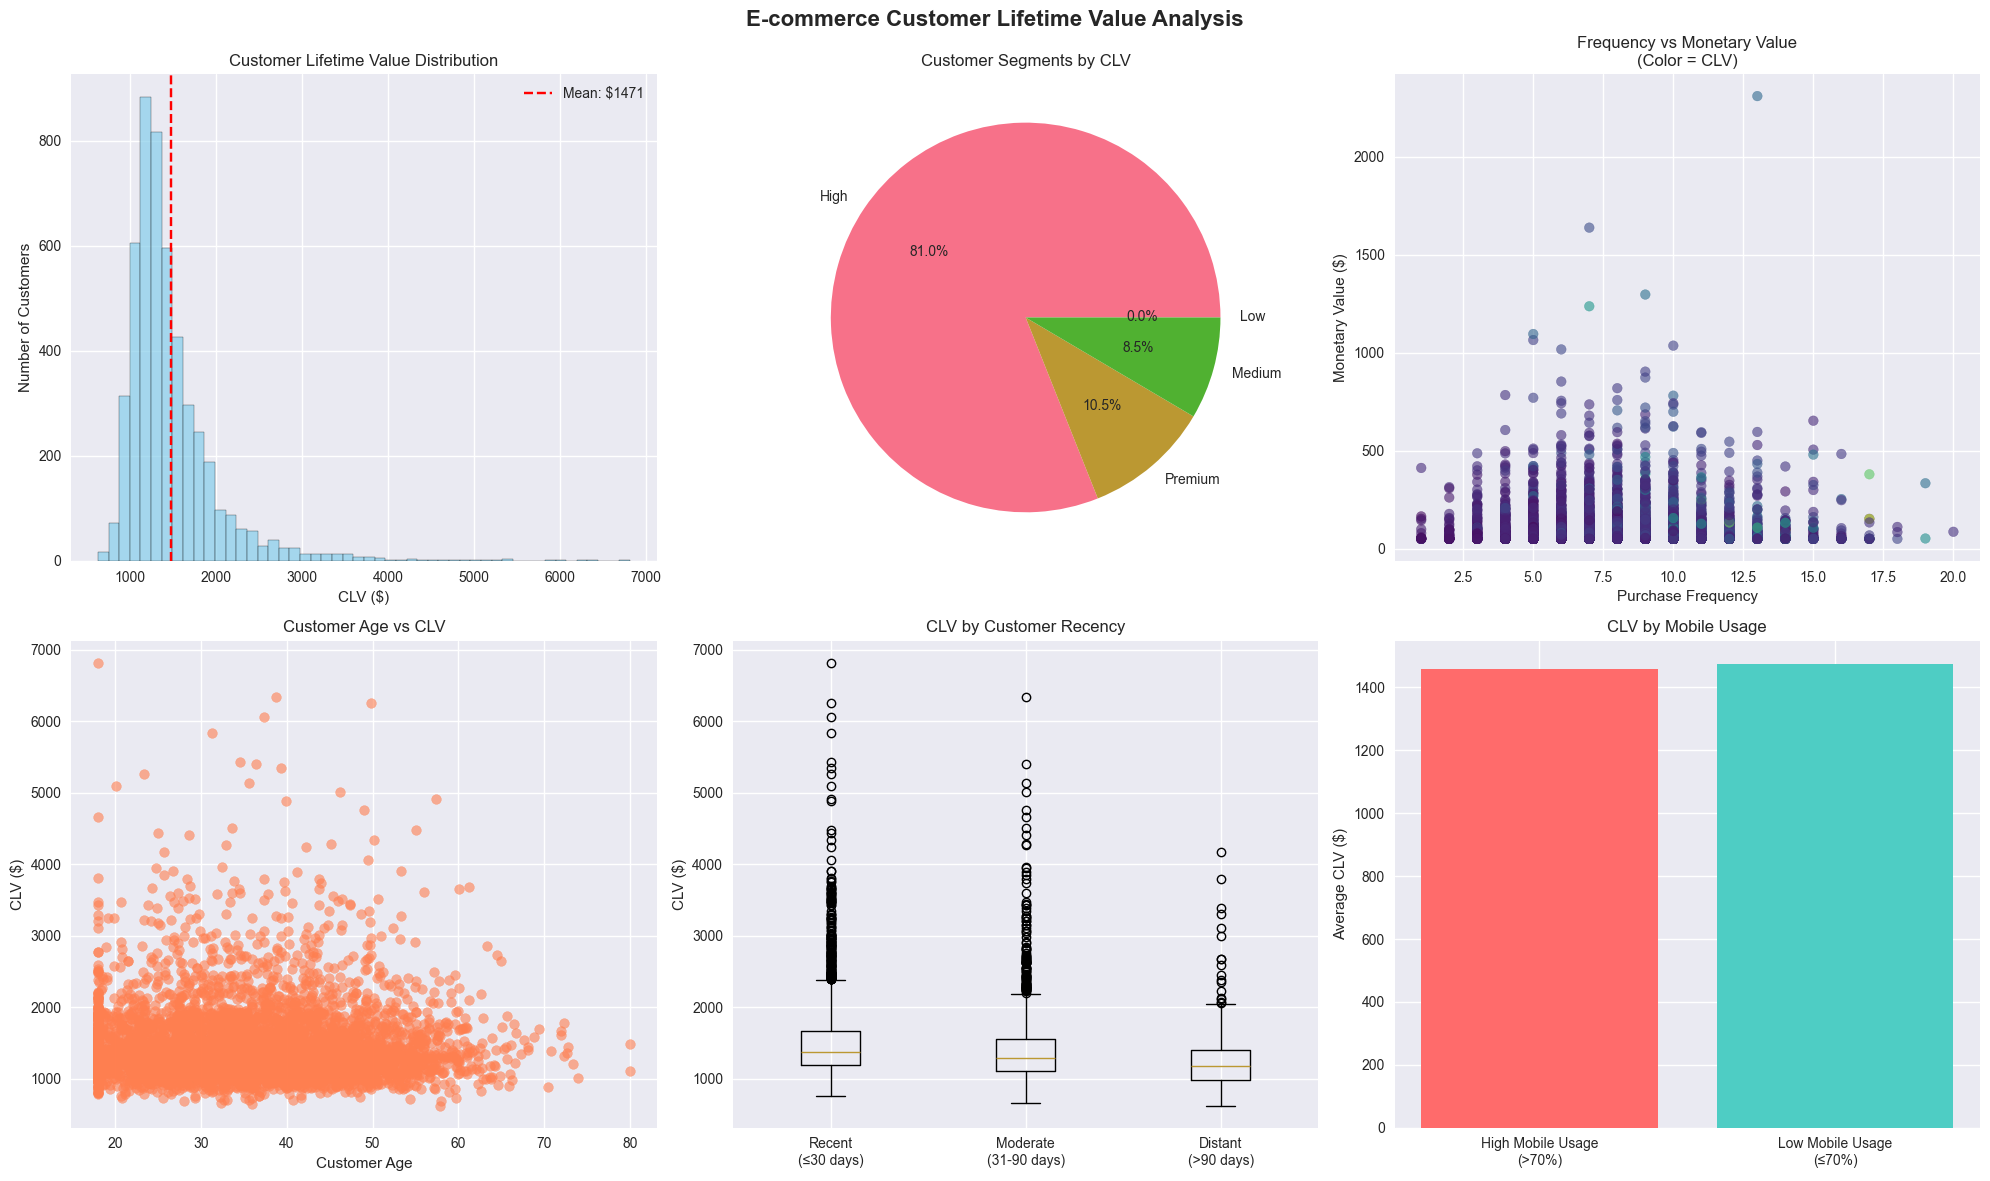


⚙️ ENGINEERING DOMAIN-SPECIFIC FEATURES...

🤖 TRAINING MACHINE LEARNING MODELS...
=== MODEL TRAINING RESULTS ===
Random Forest:
  R² Score: 0.9608
  RMSE: $101.92
  MAE: $68.21

Gradient Boosting:
  R² Score: 0.9754
  RMSE: $80.71
  MAE: $56.79

Linear Regression:
  R² Score: 0.9032
  RMSE: $160.18
  MAE: $94.35



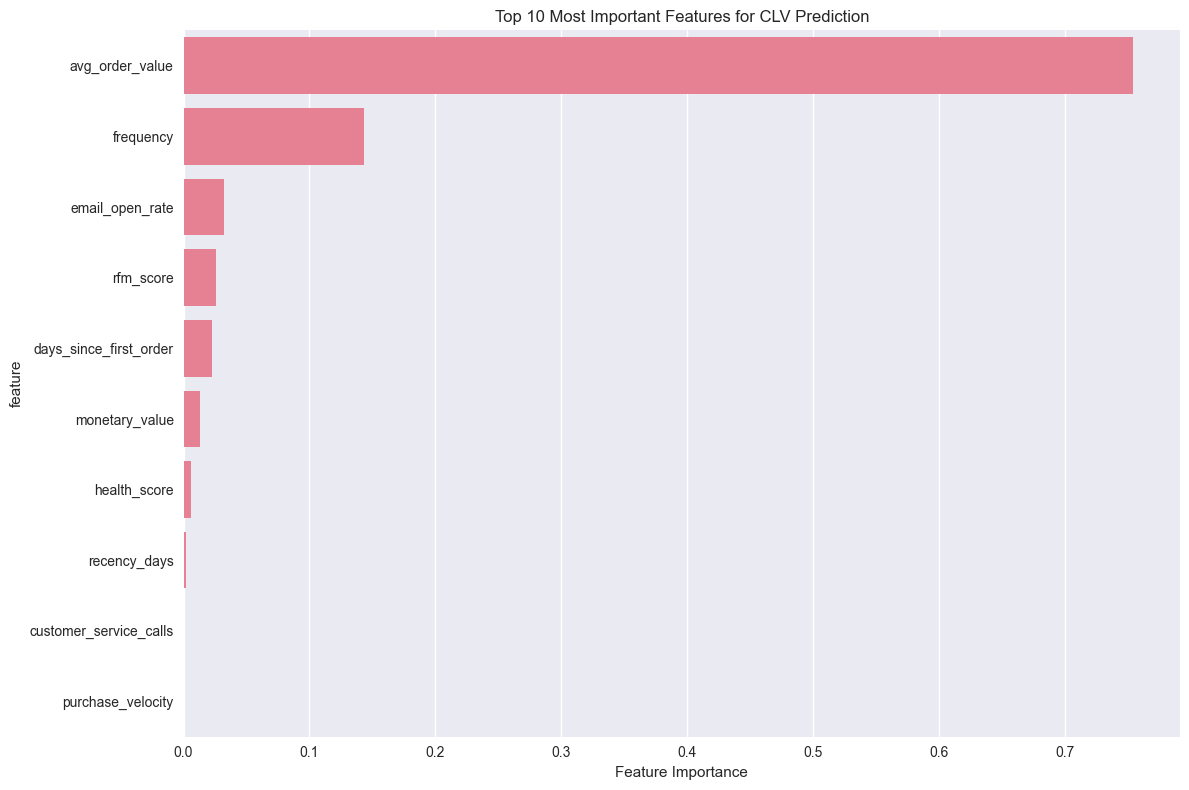


💰 ANALYZING BUSINESS IMPACT...
=== BUSINESS IMPACT ANALYSIS ===
Model Accuracy: 97.5% of CLV variance explained
Prediction Error: ±$81 on average

PROJECTED BUSINESS IMPROVEMENTS:
• Reduce CAC by 25%: $45 → $34
• Increase retention by 15%: 60% → 69%

FINANCIAL IMPACT (Annual):
• Revenue gain from retention: $11,250,000
• Cost savings from efficient targeting: $500,000
• TOTAL PROJECTED IMPACT: $11,750,000

• ROI on ML Investment: 23400%

📋 GENERATING RECOMMENDATIONS...

=== ACTIONABLE RECOMMENDATIONS ===
1. CUSTOMER SEGMENTATION STRATEGY:
   • 524 high-value customers ($2664 avg CLV)
   • 183 at-risk valuable customers need retention campaigns

2. MARKETING OPTIMIZATION:
   • Email engagement drives CLV - implement personalized email campaigns
   • Purchase frequency is key - create loyalty programs to increase repeat purchases

3. OPERATIONAL IMPROVEMENTS:
   • Reduce customer service issues - customers with >3 calls have $125 lower CLV
   • Implement proactive customer success progr

In [5]:
def main():
    """
    Main execution function demonstrating the complete project workflow
    """
    print("🚀 E-COMMERCE CUSTOMER LIFETIME VALUE PREDICTION PROJECT")
    print("=" * 60)
    
    # Initialize predictor
    clv_predictor = CLVPredictor()
    
    # Generate and analyze data
    print("\n📊 GENERATING SYNTHETIC E-COMMERCE DATA...")
    df = clv_predictor.generate_synthetic_data(n_customers=5000)
    
    print("\n🔍 PERFORMING EXPLORATORY DATA ANALYSIS...")
    df = clv_predictor.exploratory_data_analysis(df)
    
    print("\n⚙️ ENGINEERING DOMAIN-SPECIFIC FEATURES...")
    df_engineered = clv_predictor.feature_engineering(df)
    
    print("\n🤖 TRAINING MACHINE LEARNING MODELS...")
    X_test, y_test, feature_columns = clv_predictor.train_models(df_engineered)
    
    print("\n💰 ANALYZING BUSINESS IMPACT...")
    business_impact = clv_predictor.business_impact_analysis()
    
    print("\n📋 GENERATING RECOMMENDATIONS...")
    clv_predictor.generate_actionable_recommendations(df_engineered)
    
    print("\n✅ PROJECT COMPLETE!")
    print("\nThis project demonstrates:")
    print("• Domain-specific problem solving (E-commerce CLV)")
    print("• Clear business context and storytelling")
    print("• Professional code structure and documentation") 
    print("• Comprehensive data visualization")
    print("• Concrete business impact quantification")
    print("• Actionable recommendations for stakeholders")
    print("• Technical excellence with multiple model comparison")

if __name__ == "__main__":
    main()